---
Total Wildfires in the USA from 1992 to 2015
--
1. There has been a decrease in the total number of wildfires each year. 
2. However, there has been an increase in the totals for certain states, particularly in the mid-south to south-east.  
3. Most notably, Georgia, Texas, and Mississpippi had the most wildfires during this time.  

---
Sources: 
---
1. https://www.kaggle.com/rtatman/188-million-us-wildfires/kernels 
2. https://plot.ly 
3. https://ezgif.com/apng-maker

In [40]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go


In [41]:
# Load data
fp = "../Resources/Fire_Data_Over_1.csv"

map_df = pd.read_csv(fp)

map_df.head()

Unnamed: 0  FOD_ID FIRE_NAME  FIRE_YEAR  DISCOVERY_DATE  DISCOVERY_DOY  \
0          13      14     TIGER       2004       2453276.5            272   
1          16      17     POWER       2004       2453284.5            280   
2          17      18     FREDS       2004       2453291.5            287   
3          24      25     EAGLE       2004       2453187.5            183   
4          25      26  BACHELOR       2004       2453206.5            202   

   DISCOVERY_TIME  STAT_CAUSE_CODE STAT_CAUSE_DESCR  FIRE_SIZE  \
0          1200.0              4.0         Campfire        6.0   
1          1415.0              2.0    Equipment Use    16823.0   
2          1618.0              2.0    Equipment Use     7700.0   
3          1712.0              1.0        Lightning        2.5   
4          1405.0              1.0        Lightning       10.0   

  FIRE_SIZE_CLASS   LATITUDE   LONGITUDE STATE COUNTY  
0               B  38.433333 -120.510000    CA      5  
1               G  38.523333 -120.211667    CA      5  
2               G  38.780000 -120.260000    CA     17  
3               B  33.545278 -105.229444    NM     27  
4               C  33.315833 -105.512222    NM     27

In [42]:
# Remove Puerto Rico since it won't show up on our map

new = map_df.loc[(map_df.loc[:,'STATE']!='PR')]
new.head()

Unnamed: 0  FOD_ID FIRE_NAME  FIRE_YEAR  DISCOVERY_DATE  DISCOVERY_DOY  \
0          13      14     TIGER       2004       2453276.5            272   
1          16      17     POWER       2004       2453284.5            280   
2          17      18     FREDS       2004       2453291.5            287   
3          24      25     EAGLE       2004       2453187.5            183   
4          25      26  BACHELOR       2004       2453206.5            202   

   DISCOVERY_TIME  STAT_CAUSE_CODE STAT_CAUSE_DESCR  FIRE_SIZE  \
0          1200.0              4.0         Campfire        6.0   
1          1415.0              2.0    Equipment Use    16823.0   
2          1618.0              2.0    Equipment Use     7700.0   
3          1712.0              1.0        Lightning        2.5   
4          1405.0              1.0        Lightning       10.0   

  FIRE_SIZE_CLASS   LATITUDE   LONGITUDE STATE COUNTY  
0               B  38.433333 -120.510000    CA      5  
1               G  38.523333 -120.211667    CA      5  
2               G  38.780000 -120.260000    CA     17  
3               B  33.545278 -105.229444    NM     27  
4               C  33.315833 -105.512222    NM     27

In [43]:
# Sort by year ascending 

df = new.sort_values(["FIRE_YEAR", "STATE"])
df.dropna(how="any")
df = df.reset_index(drop=True)
df.head()

Unnamed: 0  FOD_ID FIRE_NAME  FIRE_YEAR  DISCOVERY_DATE  DISCOVERY_DOY  \
0       53189   53637       NaN       1992       2448753.5            132   
1       53190   53638       NaN       1992       2448754.5            133   
2       53193   53641       NaN       1992       2448772.5            151   
3       53197   53645       NaN       1992       2448777.5            156   
4      173288  175112       NaN       1992       2448783.5            162   

   DISCOVERY_TIME  STAT_CAUSE_CODE STAT_CAUSE_DESCR  FIRE_SIZE  \
0           730.0              5.0   Debris Burning        2.0   
1          1301.0              5.0   Debris Burning       40.0   
2          2030.0              9.0    Miscellaneous        2.5   
3          1504.0              5.0   Debris Burning        2.0   
4          1830.0             12.0        Structure       27.0   

  FIRE_SIZE_CLASS   LATITUDE   LONGITUDE STATE COUNTY  
0               B  60.500000 -149.866667    AK    NaN  
1               C  60.500000 -149.866667    AK    NaN  
2               B  60.733333 -149.383333    AK    NaN  
3               B  60.183333 -149.333333    AK    NaN  
4               C  61.849300 -156.352300    AK    NaN

In [44]:
# Simplify to two columns and count number of wildfires in each year

group_df = df[['FIRE_YEAR','STATE']]
state_totals = list(df.groupby("STATE")["FIRE_YEAR"].count())
year_totals = list(group_df["FIRE_YEAR"].value_counts())

group_df.head()

FIRE_YEAR STATE
0       1992    AK
1       1992    AK
2       1992    AK
3       1992    AK
4       1992    AK

In [165]:
# Make a unique data frame to pull unique years and states

unique_df = group_df.drop_duplicates().reset_index(drop=True)
unique_states = group_df.loc[group_df["FIRE_YEAR"] == 2015].drop_duplicates().reset_index(drop=True)

unique_df.head()

FIRE_YEAR STATE
0       1992    AK
1       1992    AL
2       1992    AR
3       1992    AZ
4       1992    CA

In [177]:
# Make a df of totals for the years

years = list(range(1992,2016))

years_df = pd.DataFrame({
    "Year": years,
    "Totals": year_totals
})
years_df.head()

#could make a line graph with this data

Year  Totals
0  1992   49583
1  1993   41500
2  1994   40036
3  1995   36389
4  1996   35920

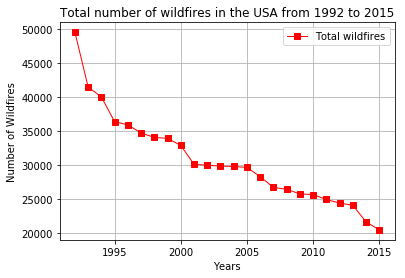

In [167]:
wildfire, = plt.plot(years_df["Year"],years_df["Totals"], marker="s", color="Red", linewidth=1, label="Total wildfires") 
plt.legend(loc="best") 
plt.grid()
plt.title("Total number of wildfires in the USA from 1992 to 2015")
plt.xlabel("Years")
plt.ylabel("Number of Wildfires")
plt.savefig("graphs/total_wildfires_years.png")
plt.show()

In [176]:
# Make a df of totals for the states

states = unique_states["STATE"]

states_df = pd.DataFrame({ 
    "State": states, 
    "Totals": state_totals
})
states_df.head()

#this data will be used later to make our cloropleth map of wildfires across all years 

State  Totals
0    AK    4326
1    AL   44588
2    AR   21808
3    AZ   15342
4    CA   39563

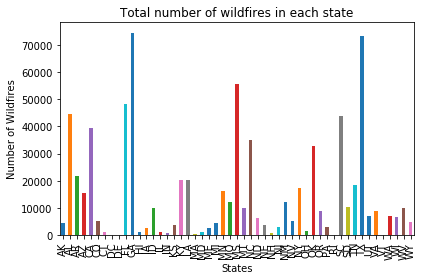

In [184]:
state_totals = df.groupby("STATE")["FIRE_YEAR"].count()

state_totals_chart = state_totals.plot(kind="bar")

plt.title("Total number of wildfires in each state")
plt.xlabel("States")
plt.ylabel("Number of Wildfires")

plt.savefig("graphs/total_wildfires_states.png")
plt.tight_layout() 
plt.show()

In [170]:
# Get the number of wildfires in each year in each state

df = df[["FIRE_YEAR", "STATE"]]
totals = list(df.groupby(["FIRE_YEAR", "STATE"])["STATE"].count())
unique_df["Totals"] = totals
unique_df.head()

FIRE_YEAR STATE  Totals
0       1992    AK     133
1       1992    AL      58
2       1992    AR      89
3       1992    AZ     936
4       1992    CA    2299

In [171]:
# Use pd.pivot_tableto make a new dataframe 

unique_df = pd.pivot_table(unique_df, values = 'Totals', index=['STATE'], columns = 'FIRE_YEAR').reset_index()
unique_df

FIRE_YEAR STATE    1992    1993    1994    1995    1996    1997    1998  \
0            AK   133.0   254.0   205.0    92.0   191.0   254.0    73.0   
1            AL    58.0    96.0  2331.0  2715.0  2707.0  1643.0  2314.0   
2            AR    89.0    88.0    98.0   149.0   147.0   716.0   730.0   
3            AZ   936.0  1733.0  1201.0  1430.0   720.0   347.0   547.0   
4            CA  2299.0  2092.0  2038.0  1788.0  2398.0  1658.0  1470.0   
5            CO   187.0   190.0   523.0   305.0   252.0    85.0   153.0   
6            CT    41.0    55.0    73.0    58.0     9.0    33.0    24.0   
7            DC     NaN     2.0     1.0     NaN     NaN     NaN     1.0   
8            DE     2.0     NaN     1.0     2.0     NaN     4.0     NaN   
9            FL  2582.0  2544.0  1968.0  1776.0  2729.0  2194.0  2500.0   
10           GA  3285.0  4084.0  3024.0  3342.0  4423.0  2896.0  2732.0   
11           HI    43.0     6.0     2.0     5.0     5.0     1.0    20.0   
12           IA     4.0     3.0     4.0     5.0    25.0     7.0     3.0   
13           ID   514.0   101.0   716.0   333.0   593.0   278.0   375.0   
14           IL    12.0     3.0    17.0    32.0    15.0     3.0    14.0   
15           IN    23.0    10.0    19.0    32.0    20.0     4.0    13.0   
16           KS    12.0    12.0    33.0    15.0    22.0    14.0    25.0   
17           KY    35.0    53.0   128.0   116.0    47.0   515.0   736.0   
18           LA    67.0    89.0    62.0    99.0   123.0   925.0  1601.0   
19           MA     1.0     NaN     NaN     1.0     1.0     1.0     1.0   
20           MD     9.0     9.0    10.0    20.0    14.0    13.0    11.0   
21           ME   174.0   174.0   136.0   169.0    65.0   135.0   117.0   
22           MI   274.0   129.0   349.0   299.0   185.0    53.0    65.0   
23           MN   661.0   617.0   809.0   768.0   723.0   914.0   879.0   
24           MO  1237.0   645.0  1205.0  1618.0   284.0   907.0   399.0   
25           MS  3339.0  2950.0  2512.0  3710.0  3889.0  2036.0  2907.0   
26           MT   391.0   151.0   736.0   259.0   584.0   230.0   495.0   
27           NC  2002.0  1579.0  1864.0  1572.0  1474.0  1508.0  1549.0   
28           ND   206.0   196.0   247.0   116.0   253.0   192.0   219.0   
29           NE    13.0    12.0    57.0    43.0    40.0    28.0    31.0   
30           NH    38.0    33.0    48.0    64.0    22.0    26.0    54.0   
31           NJ   251.0   101.0   204.0   295.0   120.0   207.0   155.0   
32           NM   343.0   728.0  1168.0   597.0   743.0   461.0   489.0   
33           NV   117.0   116.0   187.0   179.0   404.0   136.0   199.0   
34           NY   154.0   110.0    57.0   241.0    36.0   149.0   137.0   
35           OH    15.0     7.0    12.0    29.0     5.0     5.0    12.0   
36           OK  1081.0  1582.0  1372.0  1878.0  1884.0   869.0   734.0   
37           OR   476.0   211.0   534.0   273.0   531.0   247.0   357.0   
38           PA     2.0     3.0     9.0     7.0     3.0     9.0     8.0   
39           RI     NaN     NaN     1.0     NaN     NaN     NaN     NaN   
40           SC  2758.0  2696.0  2446.0  1788.0  2483.0  1714.0  1762.0   
41           SD   181.0   122.0   286.0   160.0   247.0   131.0   248.0   
42           TN    33.0    28.0    50.0    66.0    27.0   805.0  1001.0   
43           TX   843.0  1148.0   677.0  1257.0  2277.0   588.0  1416.0   
44           UT   236.0   159.0   479.0   328.0   545.0   204.0   226.0   
45           VA    19.0    21.0    40.0   568.0   286.0   376.0   382.0   
46           VT     1.0     1.0     4.0     NaN     NaN     1.0     2.0   
47           WA   377.0   158.0   422.0   223.0   276.0   180.0   272.0   
48           WI   264.0   168.0   475.0   347.0   324.0   321.0   309.0   
49           WV   359.0   396.0   569.0   612.0   255.0   287.0   462.0   
50           WY   248.0    62.0   380.0   188.0   480.0    69.0    56.0   

FIRE_YEAR    1999    2000   ...      2006    2007    2008    2009    2010  \
0           165.0   10

In [163]:
# Now to make cloropleth maps 

for col in states_df.columns:
    states_df[col] = states_df[col].astype(str)

scl = [[0.0, 'rgb(255,215,0)'],
       [0.2, 'rgb(255,165,0)'],
       [0.4, 'rgb(255,140,0)'],
       [0.6, 'rgb(255,115,0)'],
       [0.8, 'rgb(255,90,0)'],
       [1.0, 'rgb(255,65,0)']]

df['text'] = states_df['State']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = states_df['State'],
        z = unique_df[2015].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Wildfires")
        ) ]

layout = dict(
        title = 'USA Wildfires 2015 </br></br>Source: Kaggle</br></br> Note: black indicates none',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

---
Sources: 
---
1. https://www.kaggle.com/rtatman/188-million-us-wildfires/kernels 
2. https://plot.ly 
3. https://ezgif.com/apng-maker